<p style = "font-size : 50px ; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Insurance Fraud Detection</strong></p>

## Today, our objective is to create the best classifier for Insurance fraud detection. To do it, we'll compare classification models from different methods :

* Support Vector Classifier
* Knn
* Decision Tree Classifier
* Random Forest Classifier
* Ada Boost Classifier
* Gradient Boosting Classifier
* Stochastic Gradient Boosting (SGB)
* XgBoost

# Table of Contents

    
* [Data Preprocessing](#1.0)
    * [Visualizing Missing values](#1.1)
    * [Handling Missing Values](#1.2)
    * [Encoding Categorical columns](#1.3)
    * [Outliers Detection](#1.4)
    
* [Models](#2.0)
    * [Support Vector Classifier](#2.1)
    * [Knn](#2.2)
    * [Decision Tree Classifier](#2.3)
    * [Random Forest Classifier](#2.4)
    * [Ada Boost Classifier](#2.5)
    * [Gradient Boosting Classifier](#2.6)
    * [Stochastic Gradient Boosting (SGB)](#2.7)
    * [XgBoost](#2.8)


* [Models Comparison](#3.0)


In [1]:
# Import important Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import sklearn
import plotly
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Models
#Suport Vector Classifier
from sklearn.svm import SVC 
# KNN 
from sklearn.neighbors import KNeighborsClassifier 
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#  Ada Boost Classifier 
from sklearn.ensemble import AdaBoostClassifier 
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# xgboost 
from xgboost import XGBClassifier 


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# print(f"Cufflinks version : cufflinks {cf.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.19.5
Pandas version : Pandas 1.2.3
Matplotlib version : Matplotlib 3.4.1
Seaborn version : Seaborn 0.11.1
SkLearn version : SkLearn 0.24.1
Plotly version : plotly 4.14.3


In [3]:
df = pd.read_csv('../input/auto-insurance-claims-data/insurance_claims.csv')

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

# Descriptive Statistics about the Data

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# Information About the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data Pre-Processing

In [9]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Visualizing Missing Values

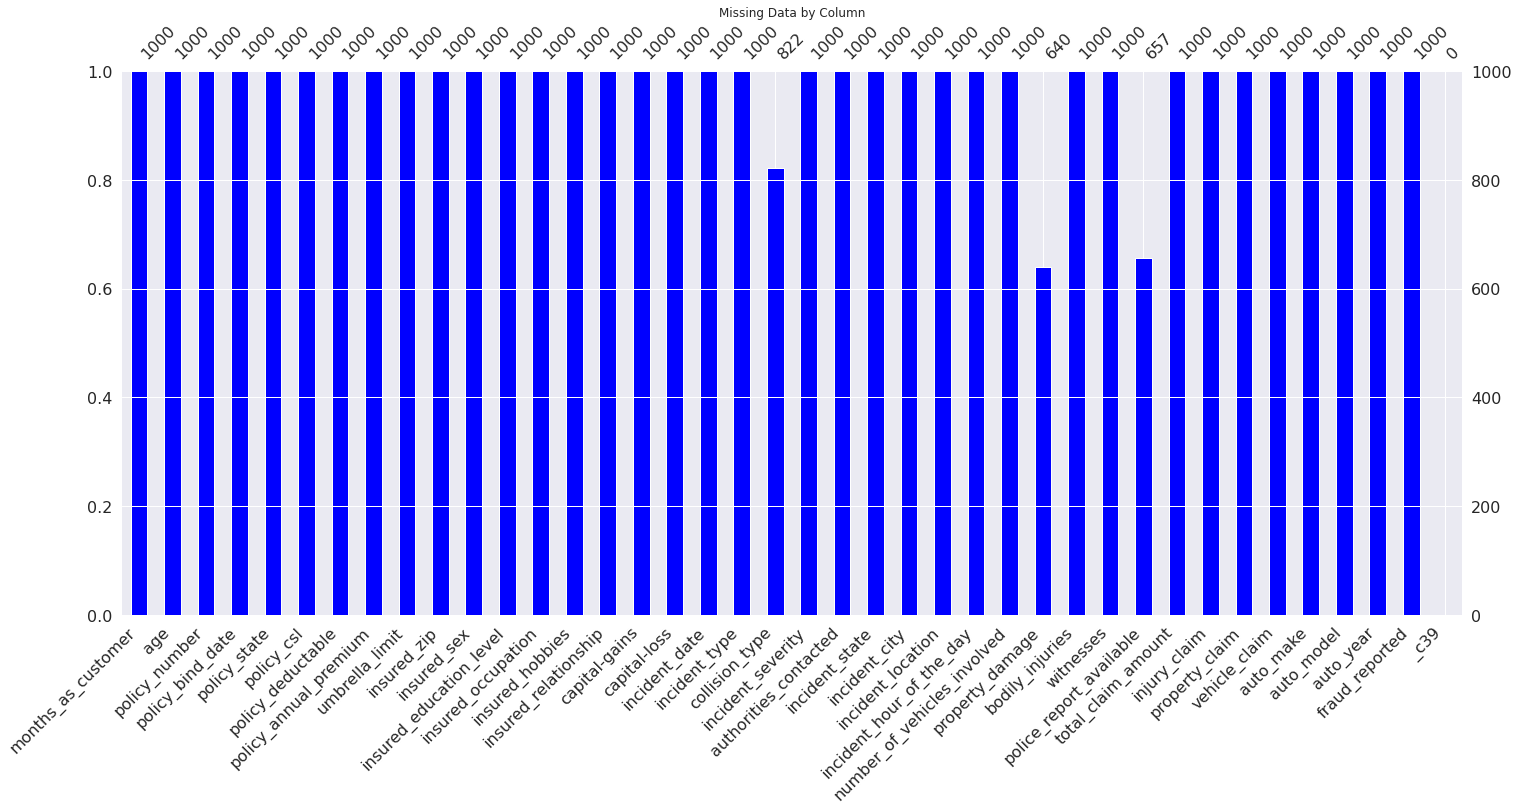

In [10]:
msno.bar(df, color='blue')
plt.title('Missing Data by Column')
plt.show()

# Handling missing values

In [11]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [12]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [13]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [14]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Display heatmap

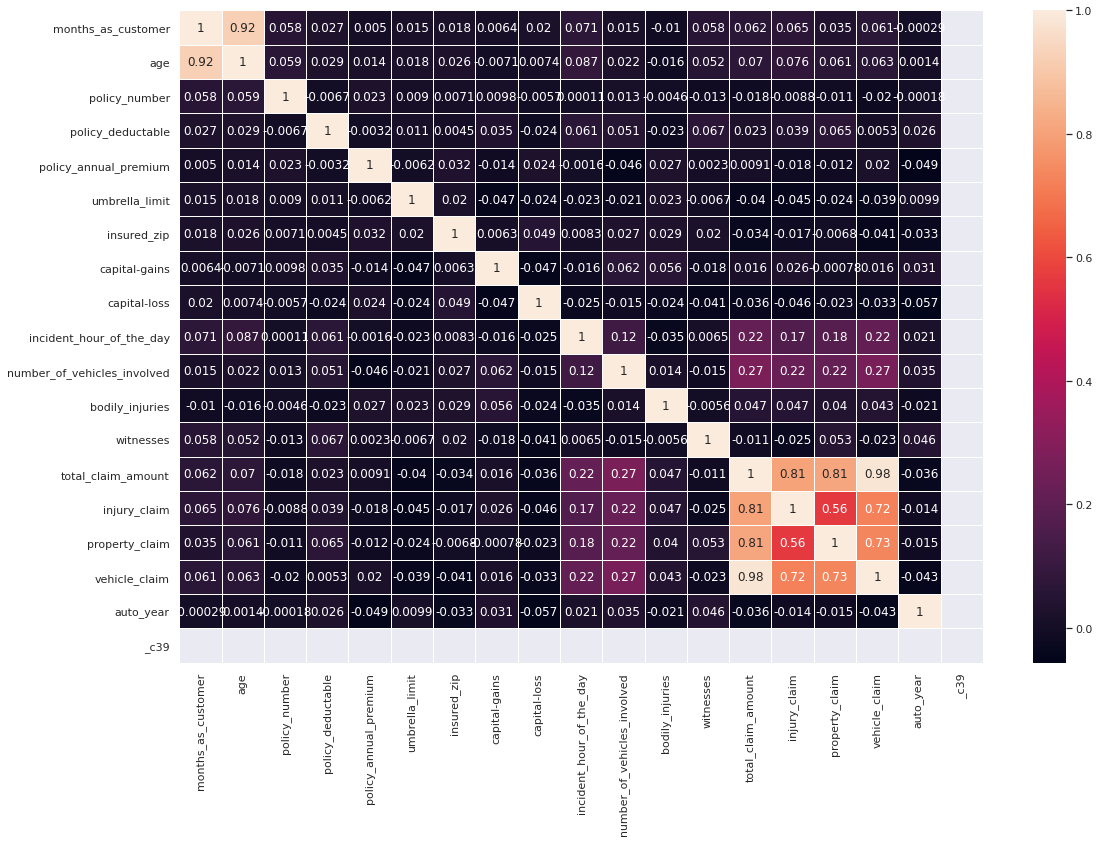

In [15]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [16]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [17]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [18]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


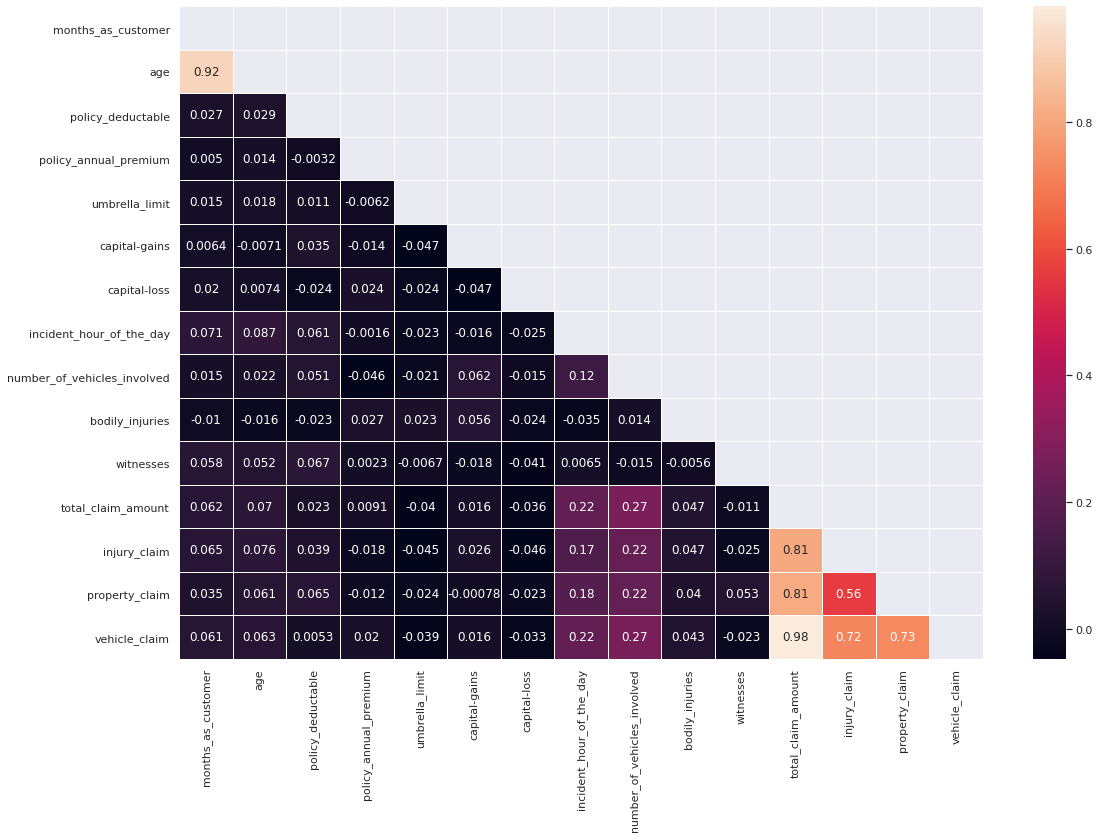

In [19]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

**From the above plot, we can see that there is high correlation between `age` and `months_as_customer`.We will drop the "Age" column. Also there is high correlation between `total_clam_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. So we will drop the total claim column.**

In [20]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [21]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [23]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

# Encoding Categorical columns

In [24]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [25]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [26]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [27]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [28]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [29]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [30]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [31]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [32]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


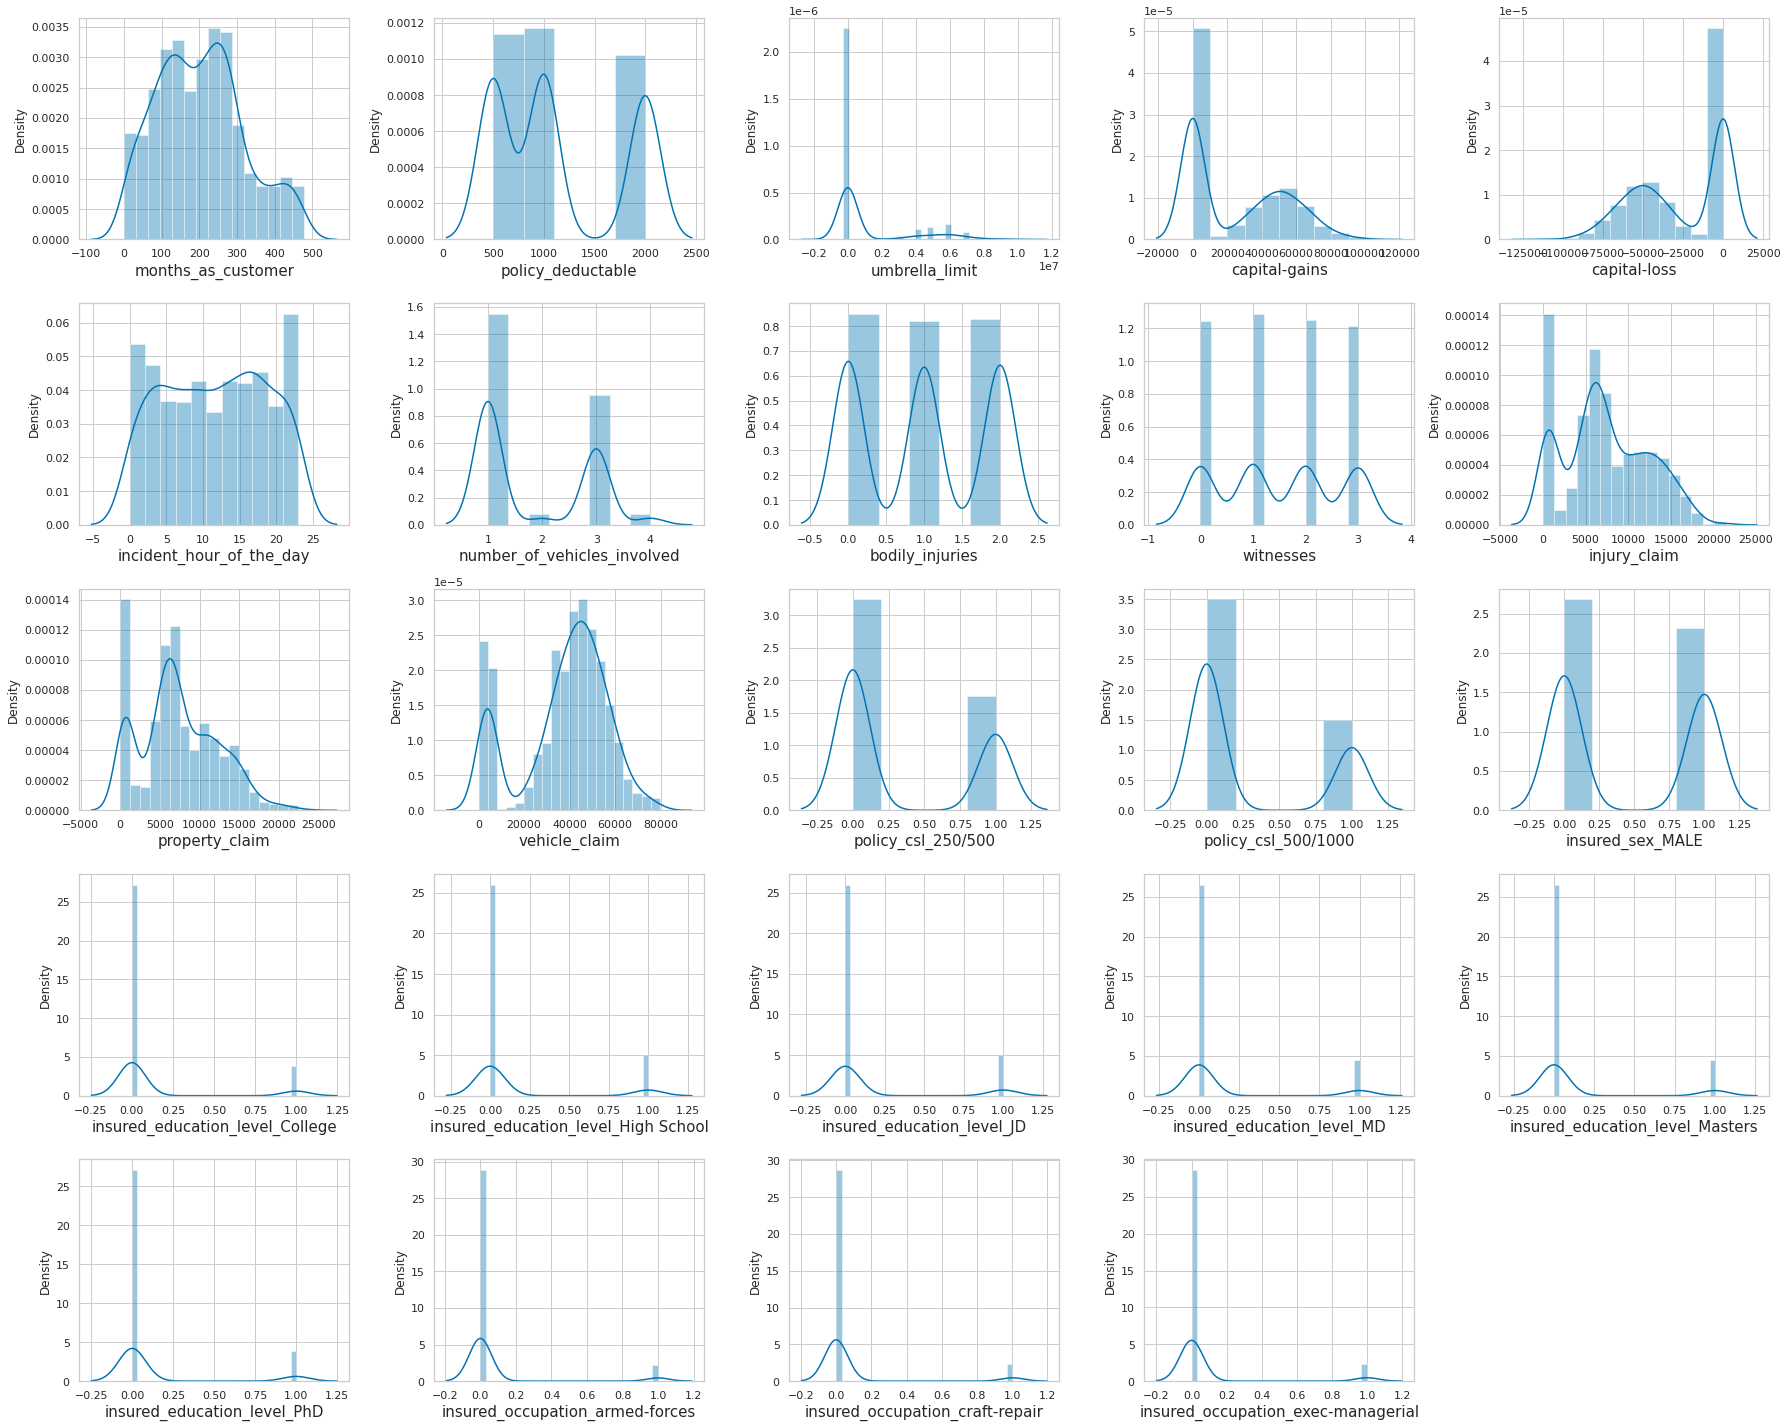

In [33]:
plt.figure(figsize = (25, 20))
plotnumber = 1
sns.set_style('whitegrid')

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Outliers Detection

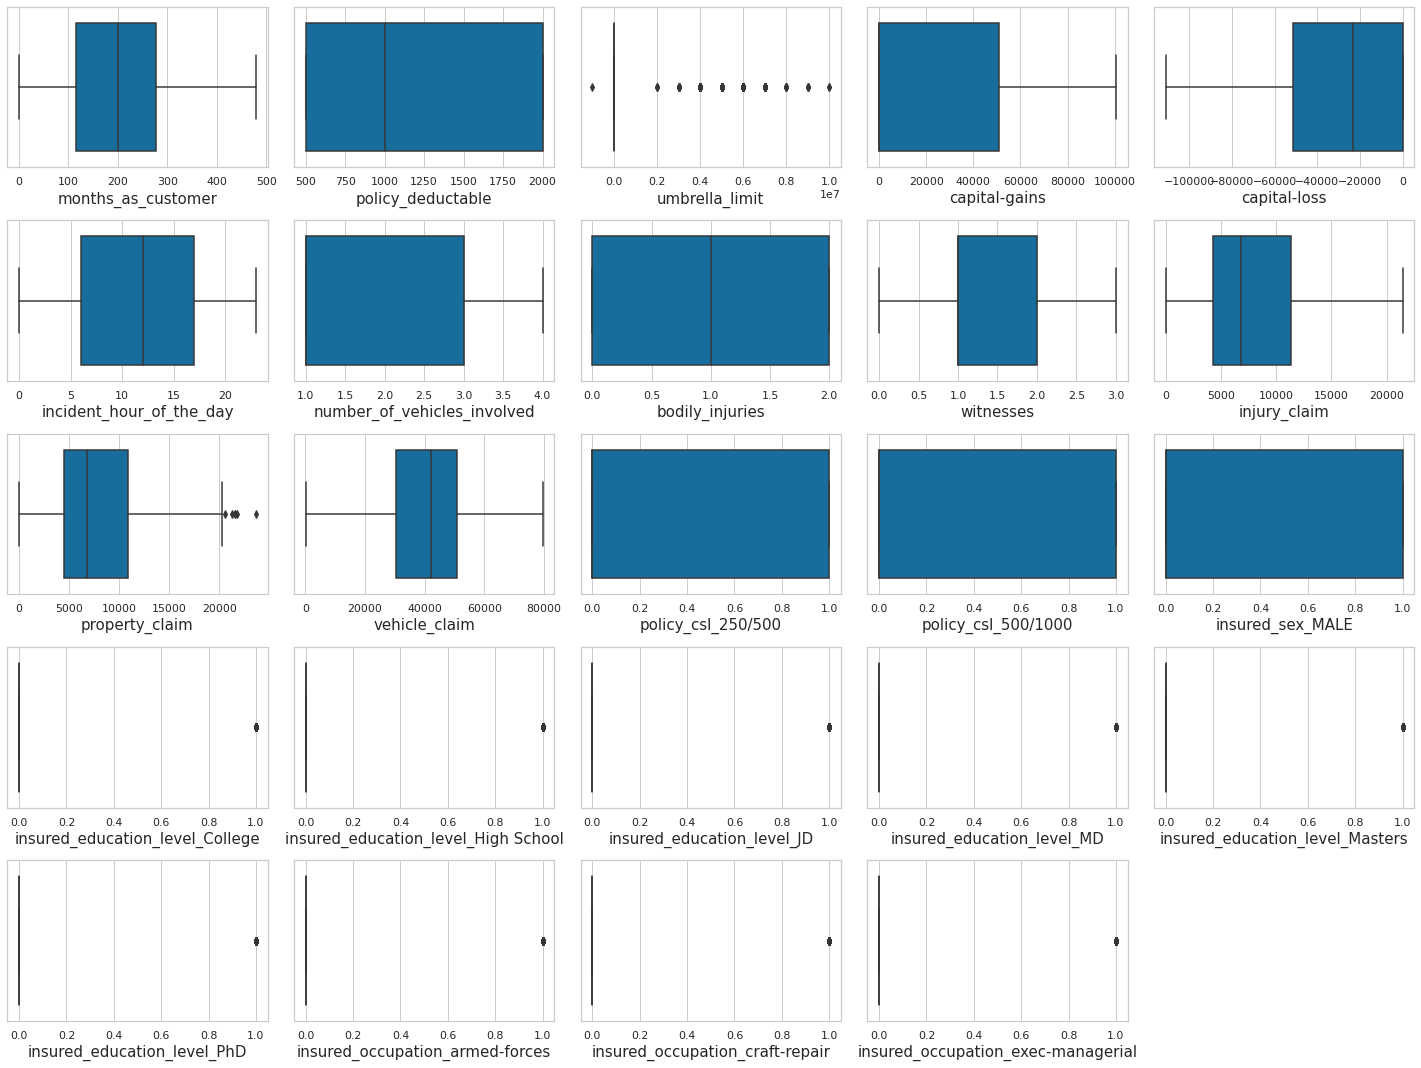

In [34]:
plt.figure(figsize = (20, 15))
plotnumber = 1
sns.set_style('whitegrid')

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

# splitting data into training set and test set

In [35]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
74,192,1000,0,0,0,18,3,1,0,9540,...,1,1,0,0,0,0,0,0,1,1
229,154,1000,0,0,-67800,2,1,0,3,14460,...,0,1,0,0,0,0,1,0,0,0
640,182,2000,0,53800,-78300,18,1,2,3,8150,...,1,0,1,0,0,0,0,1,0,1
941,284,500,0,47900,0,19,3,0,0,8520,...,1,0,0,0,1,0,0,0,0,0
27,202,500,3000000,31000,-30200,5,1,2,1,1040,...,0,1,0,0,0,1,0,0,1,0


In [37]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [38]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [39]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
74,-0.131436,-0.245070,-0.470141,-0.908476,0.971033,0.920029,1.108358,0.004865,-1.344333,0.451445,-0.527567,-0.457374
229,-0.454279,-0.245070,-0.470141,-0.908476,-1.447833,-1.365284,-0.838407,-1.211410,1.356336,1.461701,-0.017404,1.081601
640,-0.216395,1.381502,-0.470141,1.017404,-1.822436,0.920029,-0.838407,1.221140,1.356336,0.166027,1.863566,1.469242
941,0.650182,-1.058357,-0.470141,0.806202,0.971033,1.062861,1.108358,-1.211410,-1.344333,0.242002,0.250121,-0.394171
27,-0.046478,-1.058357,0.852131,0.201232,-0.106397,-0.936788,-0.838407,1.221140,-0.444110,-1.293916,-1.408948,-1.745646


In [40]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [41]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [42]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
74,-0.131436,-0.245070,-0.470141,-0.908476,0.971033,0.920029,1.108358,0.004865,-1.344333,0.451445,...,1,1,0,0,0,0,0,0,1,1
229,-0.454279,-0.245070,-0.470141,-0.908476,-1.447833,-1.365284,-0.838407,-1.211410,1.356336,1.461701,...,0,1,0,0,0,0,1,0,0,0
640,-0.216395,1.381502,-0.470141,1.017404,-1.822436,0.920029,-0.838407,1.221140,1.356336,0.166027,...,1,0,1,0,0,0,0,1,0,1
941,0.650182,-1.058357,-0.470141,0.806202,0.971033,1.062861,1.108358,-1.211410,-1.344333,0.242002,...,1,0,0,0,1,0,0,0,0,0
27,-0.046478,-1.058357,0.852131,0.201232,-0.106397,-0.936788,-0.838407,1.221140,-0.444110,-1.293916,...,0,1,0,0,0,1,0,0,1,0


# Models

# Suport Vector Classifier

In [43]:

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [44]:
# accuracy_score

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc*100}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc*100}")


Training accuracy of Support Vector Classifier is : 84.26666666666667
Test accuracy of Support Vector Classifier is : 74.8


In [45]:
# confusion_matrix and classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187   0]
 [ 63   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       187
           Y       0.00      0.00      0.00        63

    accuracy                           0.75       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.56      0.75      0.64       250



# KNN

In [46]:


knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [47]:
# accuracy_score

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc*100}")
print(f"Test accuracy of KNN is : {knn_test_acc*100}")



Training accuracy of KNN is : 75.73333333333333
Test accuracy of KNN is : 74.8


In [48]:
# confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187   0]
 [ 63   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86       187
           Y       0.00      0.00      0.00        63

    accuracy                           0.75       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.56      0.75      0.64       250



# Decision Tree Classifier

In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [50]:
# accuracy_score



dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc*100}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc*100}")



Training accuracy of Decision Tree is : 100.0
Test accuracy of Decision Tree is : 43.2


In [51]:
# confusion_matrix and classification_report


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[98 89]
 [53 10]]
              precision    recall  f1-score   support

           N       0.65      0.52      0.58       187
           Y       0.10      0.16      0.12        63

    accuracy                           0.43       250
   macro avg       0.38      0.34      0.35       250
weighted avg       0.51      0.43      0.46       250



# hyper parameter tuning

In [52]:

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [53]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.8066666666666666


# best estimator 

In [54]:


dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [55]:
# accuracy_score

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc*100}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc*100}")



Training accuracy of Decision Tree is : 82.26666666666667
Test accuracy of Decision Tree is : 75.2


In [56]:
# confusion_matrix and classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[144  43]
 [ 19  44]]
              precision    recall  f1-score   support

           N       0.88      0.77      0.82       187
           Y       0.51      0.70      0.59        63

    accuracy                           0.75       250
   macro avg       0.69      0.73      0.70       250
weighted avg       0.79      0.75      0.76       250



# Random Forest Classifier

In [57]:


rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [58]:
# accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc*100}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc*100}")



Training accuracy of Random Forest is : 97.2
Test accuracy of Random Forest is : 75.2


In [59]:
#  confusion_matrix and classification_report


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[161  26]
 [ 36  27]]
              precision    recall  f1-score   support

           N       0.82      0.86      0.84       187
           Y       0.51      0.43      0.47        63

    accuracy                           0.75       250
   macro avg       0.66      0.64      0.65       250
weighted avg       0.74      0.75      0.74       250



# Ada Boost Classifier

In [60]:

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

# best parameter and best score


In [61]:

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}
0.8106666666666668


In [62]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [63]:
# accuracy_score

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc*100}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc*100}")



Training accuracy of Ada Boost is : 82.39999999999999
Test accuracy of Ada Boost is : 75.2


In [64]:
# confusion_matrix and classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[144  43]
 [ 19  44]]
              precision    recall  f1-score   support

           N       0.88      0.77      0.82       187
           Y       0.51      0.70      0.59        63

    accuracy                           0.75       250
   macro avg       0.69      0.73      0.70       250
weighted avg       0.79      0.75      0.76       250



# Gradient Boosting Classifier

In [65]:


gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))*100}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc*100} \n")



Training Accuracy of Gradient Boosting Classifier is 92.4
Test Accuracy of Gradient Boosting Classifier is 41.6 



In [66]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Confusion Matrix :- 
[[ 49 138]
 [  8  55]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.86      0.26      0.40       187
           Y       0.28      0.87      0.43        63

    accuracy                           0.42       250
   macro avg       0.57      0.57      0.42       250
weighted avg       0.71      0.42      0.41       250



# Stochastic Gradient Boosting (SGB)

In [67]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))*100}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc*100} \n")



Training Accuracy of Stochastic Gradient Boosting is 93.2
Test Accuracy of Stochastic Gradient Boosting is 66.4 



In [68]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Confusion Matrix :- 
[[119  68]
 [ 16  47]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.88      0.64      0.74       187
           Y       0.41      0.75      0.53        63

    accuracy                           0.66       250
   macro avg       0.65      0.69      0.63       250
weighted avg       0.76      0.66      0.69       250



# XgBoost Classifier

In [69]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

[10:51:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc*100}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc*100}")


Training accuracy of XgBoost is : 100.0
Test accuracy of XgBoost is : 67.60000000000001


In [71]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141  46]
 [ 35  28]]
              precision    recall  f1-score   support

           N       0.80      0.75      0.78       187
           Y       0.38      0.44      0.41        63

    accuracy                           0.68       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.69      0.68      0.68       250



In [72]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=2,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [73]:
# best estimator 

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [74]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc*100}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc*100}")



Training accuracy of XgBoost is : 82.39999999999999
Test accuracy of XgBoost is : 75.2


In [75]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[144  43]
 [ 19  44]]
              precision    recall  f1-score   support

           N       0.88      0.77      0.82       187
           Y       0.51      0.70      0.59        63

    accuracy                           0.75       250
   macro avg       0.69      0.73      0.70       250
weighted avg       0.79      0.75      0.76       250



# Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb), ('SGB', sgb)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

In [77]:
# accuracy_score

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc*100}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc*100}")


Training accuracy of Voting Classifier is : 88.66666666666667
Test accuracy of Voting Classifier is : 74.8


In [78]:
# confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[145  42]
 [ 21  42]]
              precision    recall  f1-score   support

           N       0.87      0.78      0.82       187
           Y       0.50      0.67      0.57        63

    accuracy                           0.75       250
   macro avg       0.69      0.72      0.70       250
weighted avg       0.78      0.75      0.76       250



# Models Comparison Results

In [79]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.752
3,Random Forest,0.752
4,Ada Boost,0.752
7,XgBoost,0.752
0,SVC,0.748
1,KNN,0.748
8,Voting Classifier,0.748
6,SGB,0.664
5,Gradient Boost,0.416


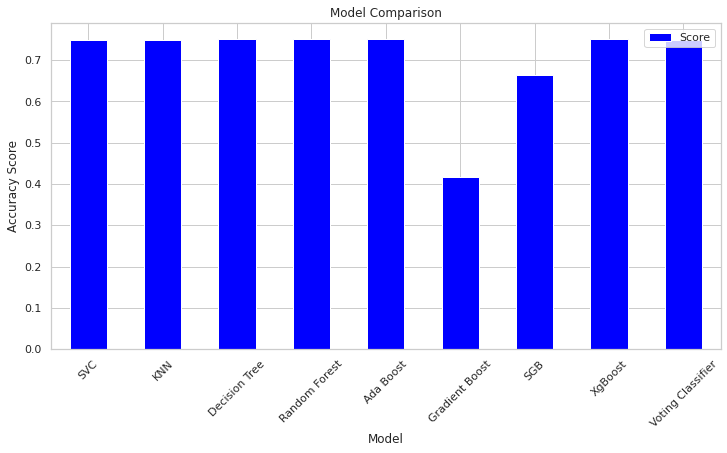

In [80]:
models.plot(kind='bar', x='Model', y='Score', color='blue', figsize=(12,6))
plt.title('Model Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()